<h1>علی ممتحن 810100213</h1>
<h1>تمرین کامپیوتری سوم درس هوش مصنوعی
</h1>


In [34]:
!pip install python_speech_features
!pip install hmmlearn
import librosa
import numpy as np
import os
import matplotlib as plt
from google.colab import files

In [35]:
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import pickle
from scipy.stats import multivariate_normal
train_test_persent = 0.8

In [36]:
# !wget https://drive.google.com/file/d/1YjBwFXlwq7M4wdimV_zHIic4oebVE9cQ/view?usp=sharing


/content/drive/MyDrive/waves/Train/blues/blues.00001.wav 2994
(13, 2994)
/content/drive/MyDrive/waves/Train/hiphop/hiphop.00025.wav 2994
(13, 2994)
/content/drive/MyDrive/waves/Train/metal/metal.00005.wav 2992
(13, 2992)
/content/drive/MyDrive/waves/Train/pop/pop.00051.wav 2992
(13, 2992)


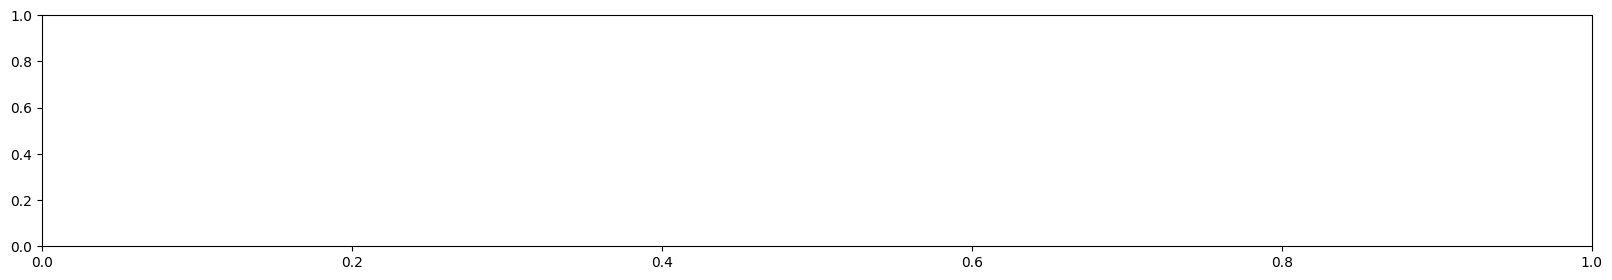

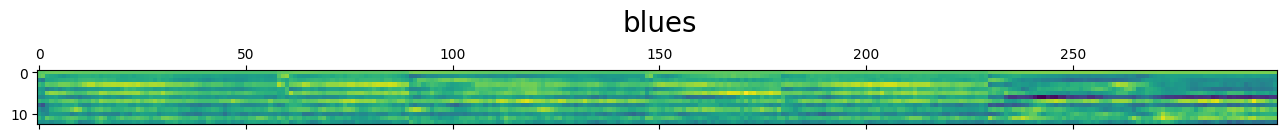

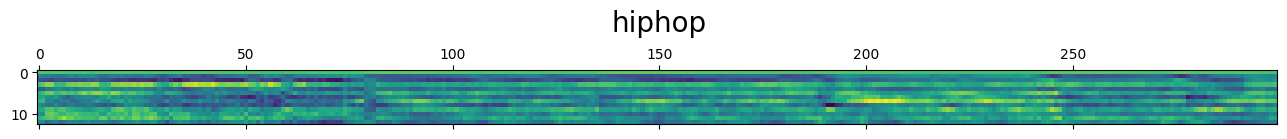

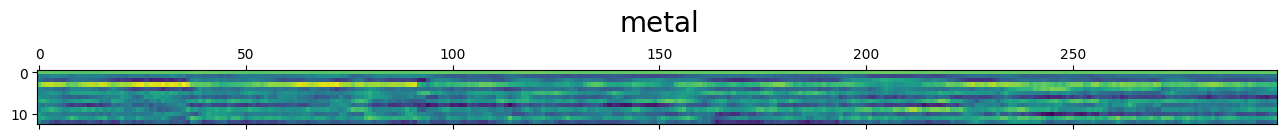

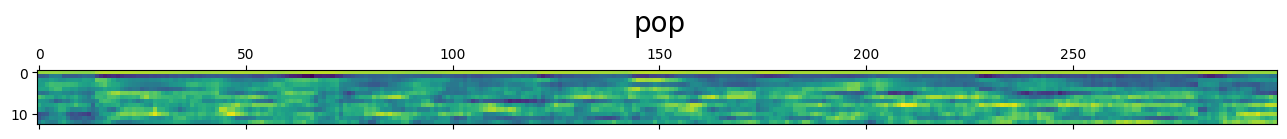

In [37]:
import glob
import os.path as path
wave_type_list = ["blues","hiphop","metal","pop"]
wave_type_list_path = []

data_folder_path = "/content/drive/MyDrive/waves/Train"
figure = plt.figure(figsize=(20,3))
total_file_name_list = []
for wtype in (wave_type_list):
   type_path = data_folder_path + "/" + wtype
   wave_type_list_path.append(type_path)
    #  print(type_path)
   file_path_list = glob.glob(path.join(type_path, "*.wav"))
    #  print(file_path_list)
   total_file_name_list.append(file_path_list)
   sample_i = random.randint(0 , 79)
   sampling_freq, audio = wavfile.read(file_path_list[sample_i])
   mfcc_features = mfcc(audio, sampling_freq, nfft=1024)
   print(file_path_list[sample_i], mfcc_features.shape[0])
   plt.yscale("linear")
   plt.matshow((mfcc_features.T)[:,:300])
   print(mfcc_features.T.shape)
   plt.text(150, -10, wtype, horizontalalignment="center", fontsize=20)

plt.yscale("linear")
plt.show()

<h1>پیش پردازش و استخراج ویژگی </h1>

<h1>سوال 1</h1>
<p dir=rtl style="text-align:center">
در بیشتر مدل ها مدل به سایز ورودی حساس است دلیل آن استفاده از عملیات های ماتریسی است که باید سایز ماتریس یکسان باشد
</p>
<h1>سوال 2</h1>
<p dir=rtl style="text-align:center">
به نظر من دلیل آن وابستگی بین فریم هاست و اینکه بعضی ویژگی ها طبیعتا در بین فریم های کنار هم یکسان هستند
</p>
<h1>سوال 3</h1>
<p dir=rtl style="text-align:center">
چیزی که متوجه شدم این است که این کار باعث کاهش ابعاد ورودی شده و محاسبات سریع تر می شود همچنین برای دامنه صدای انسان برسی این 13 تا کافی است
</p>



<h1>آشنایی با HMM </h1>

<h1>سوال 1</h1>
<p dir=rtl style="text-align:center">
استیت ها یا هایدن استیت حالتی هستند که مدل ما در زمان t می تواند داشته باشد بعد ما یک جدول احتمالاتی داریم که از هر استیت چقدر احتمال دارد به استیت بعدی برویم همچنین منظور از observation هامشاهداتی هستند که در زمان t داشتیم که با استفاده از آن ها می توانیم جدول گفته شده را آپدیت کنیم در این تمرین استیت ها نوع موسیقی هستند و observation ها فریم هایی از ویس هستند که جدا کرده و به مدل می دهیم
</p>

<h1>سوال 2</h1>
<p dir=rtl style="text-align:center">
دلیل آن این است که هر استیت یک observation دارد و تشکیل یک مدل یک hiiden Markov
 ساده است که هر استیت تنها به استیت
قبلی خود وابسته است و تفاوت آن هم همین است
</p>
<h1>سوال 3</h1>
<p dir=rtl style="text-align:center">
این مدل برای تحلیل دیتاهایی که پیوسته و دنباله ای هستند مانند ویس یا صدا یا متن مناسب هستند
دلیل آن این است که ساختار این مدل به صورت دنباله ای است و هر استیت وابستگی ای به استیت قبلی دارد که این امر در این دیتا ها هم مشاهده می شود
</p>
<h1>سوال 4</h1>
<p dir=rtl style="text-align:center">
این مدل برای دیتا های پیوسته مدل آماری مناسبی است و می تواند استفاده شود همچنین برای دیتاهایی که کامل نیستند یا در جایی از دست رفته اند هم مناسب است و می تواند برای آن ها استفاده شود
اما در عوض پیچیدگی این مدل برای دیتا های بزرگ و پیچیده تر محاسبات سنگینی دارد زیرا تعداد مشاهدات و استیت و در پی آن افزایش ابعاد ماتریس هایی که در آن باید محاسبه شود را در پی دارد
</p>
<h1>سوال5</h1>
<p dir=rtl style="text-align:center">
از انواع مختلف مدل می توان به Gaussian Mixture Model اشاره کرد که احتمال تولید استیت های پنهان توسط گوسی های مختلف مدل می شود یا می توان به Continuous-Time HMM اشاره کرد که برای
مدل هایی که در آن پیوستگی اهمیت دارد استفاده کرد یعنی یک نوع مدل hmm پیوسته حساب می شود
</p>


In [38]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                # print(self.initial_prob.shape , observation_matrix.shape )
                alpha[:,0] = self.initial_prob[:,0] * observation_matrix[:,0]
            else:
                alpha[:,t] = np.matmul(self.transition_matrix.T,alpha[:,t-1]) * observation_matrix[:,t]

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] =  np.matmul(self.transition_matrix,(observation_matrix[:,t+1] * beta[:,t+1]))
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = multivariate_normal.pdf(obs.T,mean =self.mean[:,s],cov = self.covariances[:,:,s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = np.matmul(alpha[:,t],(beta[:,t+1].T*B[:,t+1].T))*self.transition_matrix
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:,t] * beta[:,t]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:,T-1] * beta[:,T-1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = np.reshape(gamma[:, 0],(-1,1))

        expected_transition = self._stochasticize(xi_sum/np.sum(xi_sum,axis=(0,1)))
        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [39]:
hmm_model_list = []
hmm_model_list2 = []

print(wave_type_list_path)
for (i , path_type) in enumerate(wave_type_list_path):
  train_data = np.array([])
  label_list =[]
  label = wave_type_list[i]
  print(label)
  train_range = int(total_file_name_list[i].__len__() * train_test_persent)
  print("train range" , train_range)
  for j in range(train_range):

      file_path = total_file_name_list[i][j]
      # print(filepath)
      sampling_freq, audio = wavfile.read(file_path)

      mfcc_features = mfcc(audio, sampling_freq ,nfft=1024)[:2950,:]
      #print(mfcc_features.shape)

      if len(train_data) == 0:
          train_data = mfcc_features
      else:
          train_data = np.append(train_data, mfcc_features, axis=0)
      label_list.append(label)
  print('data.shape =', train_data.shape)
  new_model = hmm.GaussianHMM(n_components=5 , covariance_type="diag" , n_iter=10)
  new_model2 = HMM(num_hidden_states= 5)
  new_model.fit(train_data)
  num_iterations = 4
  # if(label == 'hiphop'):
  #   num_iterations = 30
  new_model2.train(train_data.T/np.amax(train_data.T) , num_iterations)
  hmm_model_list.append(new_model)
  hmm_model_list2.append(new_model2)

for i in range(4):
  with open("train2_"+ wave_type_list[i] + ".pkl", "wb") as f: pickle.dump(hmm_model_list2[i] , f)


for i in range(4):
  with open("train_"+ wave_type_list[i] + ".pkl", "wb") as f: pickle.dump(hmm_model_list[i] , f)


['/content/drive/MyDrive/waves/Train/blues', '/content/drive/MyDrive/waves/Train/hiphop', '/content/drive/MyDrive/waves/Train/metal', '/content/drive/MyDrive/waves/Train/pop']
blues
train range 80
data.shape = (236000, 13)
hiphop
train range 80
data.shape = (236000, 13)
metal
train range 80
data.shape = (236000, 13)
pop
train range 80
data.shape = (236000, 13)


<h1 dir=rtl style="text-align:center"> سوال 1</h1>
Accuracy:<p dir=rtl style="text-align:center">
میزان کل تشخیص های درست تقسیم بر تعداد کل تشخیص ها تعریف می شود
</p>
Precision:<p dir=rtl style="text-align:center">
این اندازه گیری برابر است با تعداد کل نمونه های مثبتی که آن ها را به درستی تشخیص دادیم تقسیم بر تعداد کل نمونه هایی که آن ها مثبت تشخیص داده ایم اما لزوما تشخیص ما درست نبوده است
</p>
Recall:<p dir=rtl style="text-align:center">
  این اندازه گیری برابر است با تعداد کل نمونه های مثبتی که آن ها را به درستی تشخیص دادیم تقسیم بر تعداد کل نمونه های مثبت که آن ها را یا درست تشخیص داده ایم یا نداده ایم
</p>
F1 Score:<p dir=rtl style="text-align:center">
  این امتیازی ترکیبی از دو امتیاز قبلی است و برابر فرمول زیر است

  $F1  =  \frac{2*Recall * Precision}{Recall + Precision}$
</p>

<h1>سوال 2</h1>
<p dir=rtl style="text-align:center">
در کسر این صورت هرکدام یکسان است اما در مخرج تفاوت دارند در precision مخرج برابر تعداد نمونه هایی است که مدل ما آن هارا درست تشخیص داده اند اما لزوما همه درست نیستند اما در دیگری مخرج برابر است نمونه هایی که واقعا درست هستند اما ممکن است مدل ما آن هارا تشخیص نداده باشد
</p>
<p dir=rtl style="text-align:center">
برای مثال اگر مدل ما طوری باشد که هر نمونه ای را مثبت تشخیص بدهد شاخص recall ما بسیار زیاد می شود درحالیکه مدل ما خوب کار نمیکند زیرا که آن هایی که مثبت نیستند هم دارد مثبت تشخیص می دهد.
در مقابل فرض کنید ما 100 نمونه مثبت و 100 نمونه منفی داریم نمونه های منفی را منفی تشخیص می دهیم اما از نمونه های مثبت تعداد کمی را مثبت تشخیص می دهیم این باعث می شود شاخص precision ما بسیار خوب شود اما مدل به خوبی کار نمیکند زیرا تعداد زیادی نمونه مثبت را اشتباه حساب کرده ایم
</p>

<h1>سوال 3</h1>
<p dir=rtl style="text-align:center">
این روش از میانگین گیری harmonic استفاده می کند یعنی به همه امتیاز دهی ها اهمیت یکسانی میدهد دلیل استفاده ما برای این است که بالا بودن هر دونوع امتیاز دهی precision و recall برای ما در این مسئله مهم است
</p>

<h1>سوال 4</h1>
<p dir=rtl style="text-align:center">
این Multi-Class Metrics یک مجموعه ای از معیار ها است که برای کلاس بندی های بیش تر از 2 تا استفاده می شود و می نواند شامل معیار های 4 precision و recall و f1 Score باشد
</p>
<p dir=rtl style="text-align:center">

</p>


In [40]:
currect_label_list = []
pred_label_list = []
pred_label_list2 = []

total_ans =0;
total_currect = 0
total_currect2 = 0


for (i , path_type) in enumerate(wave_type_list_path):
  currect_label = wave_type_list[i]
  total_ans_in_type =0
  total_currect_in_type = 0
  total_currect_in_type2 = 0

  test_range = int(total_file_name_list[i].__len__() * train_test_persent)
  end_test_range = (total_file_name_list[i].__len__())
  for j in range(test_range , end_test_range):
    file_path = total_file_name_list[i][j]
    currect_label_list.append(currect_label)


    sampling_freq, audio = wavfile.read(file_path)

    mfcc_features = mfcc(audio, sampling_freq ,nfft=1024)[:2950,:]
    max_score = - np.inf
    max_score2 = - np.inf

    pred_label = ""
    pred_label2 = ""

    for p in range(4):
        model= hmm_model_list[p]
        model2 = hmm_model_list2[p]
        label = wave_type_list[p]
        score = model.score(mfcc_features)
        score2 = model2.score(mfcc_features.T/np.amax(mfcc_features))


        if score > max_score:
            max_score = score
            pred_label = label
        if score2 > max_score2:
          max_score2= score2
          pred_label2 = label
    if pred_label == currect_label:
      total_currect += 1
      total_currect_in_type += 1
    if pred_label2 == currect_label:
      total_currect2 += 1
      total_currect_in_type2 += 1

    total_ans+=1
    total_ans_in_type += 1
    pred_label_list.append(pred_label)
    pred_label_list2.append(pred_label2)
  print("Accuracy model1 in type " , currect_label , " = " , total_currect_in_type / total_ans_in_type)
  print("Accuracy model2 in type " , currect_label , " = " , total_currect_in_type2 / total_ans_in_type)

print(total_currect)
print(total_currect2)
print(total_ans)

from sklearn.metrics import classification_report
print("model 1")
print(classification_report(currect_label_list , pred_label_list, target_names=wave_type_list))
TP=0 ; FP=0; FN=0;
for i in range(pred_label_list.__len__()):
  if pred_label_list[i] == currect_label_list[i]:
    TP += 1
  else :
    FP += 1
    FN += 1

print("precision micro for model 1:" ,TP/(TP + FP) , "recall micro for model 1:" , TP / (TP + FN) )
print("model 2")
print(classification_report(currect_label_list , pred_label_list2, target_names=wave_type_list))
TP=0 ; FP=0; FN=0;
for i in range(pred_label_list.__len__()):
  if pred_label_list2[i] == currect_label_list[i]:
    TP += 1
  else :
    FP += 1
    FN += 1

print("precision micro for model 2:" ,TP/(TP + FP) , "recall micro for model 2:" , TP / (TP + FN) )


Accuracy model1 in type  blues  =  0.9
Accuracy model2 in type  blues  =  0.85
Accuracy model1 in type  hiphop  =  0.75
Accuracy model2 in type  hiphop  =  0.15
Accuracy model1 in type  metal  =  0.7
Accuracy model2 in type  metal  =  0.95
Accuracy model1 in type  pop  =  1.0
Accuracy model2 in type  pop  =  1.0
67
59
80
model 1
              precision    recall  f1-score   support

       blues       0.69      0.90      0.78        20
      hiphop       1.00      0.75      0.86        20
       metal       0.82      0.70      0.76        20
         pop       0.91      1.00      0.95        20

    accuracy                           0.84        80
   macro avg       0.86      0.84      0.84        80
weighted avg       0.86      0.84      0.84        80

precision micro for model 1: 0.8375 recall micro for model 1: 0.8375
model 2
              precision    recall  f1-score   support

       blues       0.89      0.85      0.87        20
      hiphop       1.00      0.15      0.26     

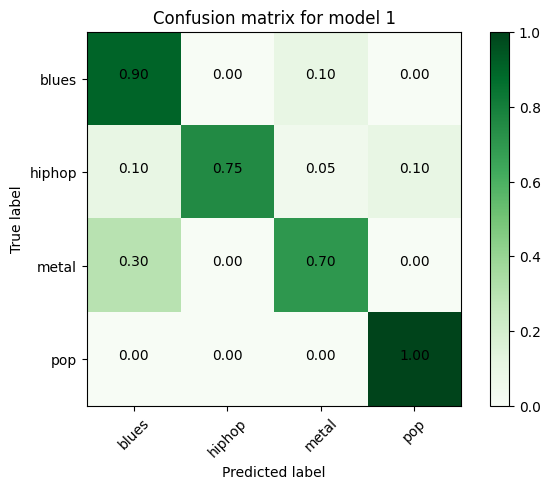

In [41]:
cm = confusion_matrix(currect_label_list, pred_label_list)
np.set_printoptions(precision=2)

plt.figure()
cmap=plt.cm.Greens
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Confusion matrix for model 1")
plt.colorbar()
tick_marks = np.arange(len(wave_type_list))
plt.xticks(tick_marks, wave_type_list, rotation=45)
plt.yticks(tick_marks, wave_type_list)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

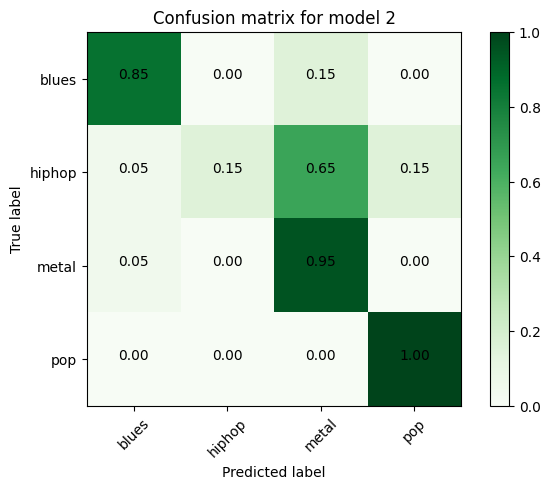

In [42]:
cm = confusion_matrix(currect_label_list, pred_label_list2)
np.set_printoptions(precision=2)
plt.figure()
cmap=plt.cm.Greens
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Confusion matrix for model 2")
plt.colorbar()
tick_marks = np.arange(len(wave_type_list))
plt.xticks(tick_marks, wave_type_list, rotation=45)
plt.yticks(tick_marks, wave_type_list)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<h1>سوال 6</h1>
<p dir=rtl style="text-align:center">
نتایج مدلی که ما ساخته ایم به وضوح ضعیف تر از مدل آماده است که این مسئله در نوع موسیقی hiphop بسیار بیشتر است . همچنین هر دو مدل در موسیقی نوع pop خیلی خوب عمل کرده اند که به نظر من دلیل آن نوع خاص دیتایی است که برای این مدل اختصاص داده شده است
</p>

<h1>سوال 7</h1>
<p dir=rtl style="text-align:center">
دلایل مختلفی می تواند داشته باشد از جمله که مدل آماده از ساختمان متفاوتی استفاده می کند و برای پارامتر های الگوریتم بهینه سازی انجام می دهد که باعث نتایج بهتری می شود . یا از الگوریتم متفاوت و بهتری استفاده می کند نسبت به مدلی که ما ساخته ایم
</p>

In [43]:
# %%shell
# jupyter nbconvert --to html /content/AI_CA3_810100213.ipynb